In [58]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,KFold,cross_val_score



In [8]:
df=load_wine()

In [19]:
df.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]], shape=(178, 13))

In [24]:
df_1=pd.DataFrame(data=df.data,columns=df["feature_names"])
df_1['target']=df.target
df_1

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


# Seaparate X and Y

In [12]:
x=pd.DataFrame(data=df['data'],columns=df["feature_names"],)
x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [13]:
y=pd.DataFrame(data=df['target'])
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


# EDA

In [25]:
df_1.shape

(178, 14)

In [28]:
df_1.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [29]:
df_1.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int64
dtype: object

## Every features is in numerical form - Completed Data preparation

# Model validation technique

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Model Building, training, predicting, testing

In [42]:
KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train,y_train)
y_predicted=KNN_model.predict(X_test)
print(accuracy_score(y_test,y_predicted))
print(confusion_matrix(y_test,y_predicted))

0.7222222222222222
[[12  0  2]
 [ 0 11  3]
 [ 2  3  3]]


C:\Users\91934\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [43]:
KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)
y_predicted=KNN_model.predict(X_test)
print(accuracy_score(y_test,y_predicted))
print(confusion_matrix(y_test,y_predicted))

0.6944444444444444
[[13  0  1]
 [ 0  9  5]
 [ 2  3  3]]


C:\Users\91934\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [44]:
KNN_model=KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train,y_train)
y_predicted=KNN_model.predict(X_test)
print(accuracy_score(y_test,y_predicted))
print(confusion_matrix(y_test,y_predicted))

0.8055555555555556
[[12  0  2]
 [ 1 11  2]
 [ 1  1  6]]


C:\Users\91934\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


##### Always use n_neighbours as a odd numbers - it will calculate the distance of nearest neighbour

# Standardization or NOrmalization
* To improve the model prediction, we are gonna normalize the data by converting the unit values into normal value

In [45]:
from sklearn.preprocessing import StandardScaler

In [52]:
std_scaler=StandardScaler()
scaled_x=std_model.fit_transform(x)
scaled_x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]], shape=(178, 13))

In [55]:
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.20, random_state=42)

In [56]:
KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train,y_train)
y_predicted=KNN_model.predict(X_test)
print(accuracy_score(y_test,y_predicted))
print(confusion_matrix(y_test,y_predicted))

0.9444444444444444
[[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]


C:\Users\91934\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [57]:
KNN_model=KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train,y_train)
y_predicted=KNN_model.predict(X_test)
print(accuracy_score(y_test,y_predicted))
print(confusion_matrix(y_test,y_predicted))

0.9444444444444444
[[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]


C:\Users\91934\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# How to get the optimized Neighbour value or K value

In [59]:
Cv_scores=[]
for i in range(1,30,1):
    KNN_model=KNeighborsClassifier(n_neighbors=i)
    kfold=KFold(n_splits=5, shuffle=True, random_state=12)
    cross_validation=cross_val_score( estimator=KNN_model,X=scaled_x,y=y,cv=kfold)
    Cv_scores.append(cross_validation.mean())



C:\Users\91934\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\91934\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\91934\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\91934\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:239: 

In [60]:
Cv_scores

[np.float64(0.9603174603174605),
 np.float64(0.9434920634920635),
 np.float64(0.9604761904761905),
 np.float64(0.949047619047619),
 np.float64(0.9719047619047618),
 np.float64(0.9660317460317461),
 np.float64(0.9717460317460318),
 np.float64(0.9717460317460318),
 np.float64(0.9660317460317461),
 np.float64(0.9660317460317461),
 np.float64(0.9660317460317461),
 np.float64(0.9660317460317461),
 np.float64(0.9774603174603176),
 np.float64(0.9660317460317461),
 np.float64(0.9660317460317461),
 np.float64(0.9660317460317461),
 np.float64(0.9660317460317461),
 np.float64(0.9603174603174605),
 np.float64(0.9660317460317461),
 np.float64(0.9717460317460318),
 np.float64(0.9831746031746033),
 np.float64(0.9774603174603176),
 np.float64(0.9774603174603176),
 np.float64(0.9717460317460318),
 np.float64(0.9717460317460318),
 np.float64(0.9717460317460318),
 np.float64(0.9717460317460318),
 np.float64(0.9717460317460318),
 np.float64(0.9661904761904762)]

In [61]:
from matplotlib import pyplot as plt
import seaborn as sns

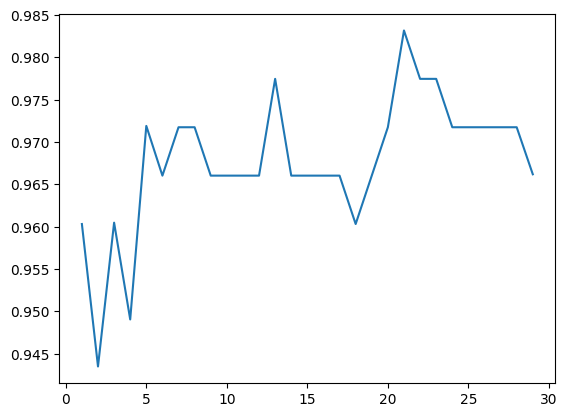

In [63]:
plt.plot(range(1,30),
    Cv_scores)

In [66]:
Cv_scores.index(max(Cv_scores))

20